In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
import sqlite3

In [13]:
con = sqlite3.connect("db.sqlite3")
df = pd.read_sql_query("SELECT * from video_management_system_video", con)

In [14]:
df

,id,video_file,product_code,product_description,factory,operation_code,operation_description,machine_number,machine_description,operator_code,operator_name,additional_details
0,1,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\5...,5221177008827,LA-Frame Bottom Node (Black),Factory 3,SWL3,لحام بنطه,,,,,
1,2,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\6...,5221177008827,LA-Frame Bottom Node (Black),Factory 3,SWL3,لحام بنطه,,,,,
2,3,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\5...,5221177008803,LA-Frame Structure (Black),Factory 3,SWL3,لحام بنطه,,,,,لحام شاسيه الLITE frame\r\nالجزء الاول
3,4,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\5...,5221177008803,LA-Frame Structure (Black),Factory 3,SWL3,لحام بنطه,,,,,
4,5,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\5...,5221177008803,LA-Frame Structure (Black),Factory 3,SWL3,لحام بنطه,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
61,74,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\6...,6221177213015,BPS Needle Shoe (P),Factory 3,SWL3,لحام بنطه,,,,,
62,75,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\6...,6221177213015,BPS Needle Shoe (P),Factory 3,WLD3,لحام تشطيب,,,,,
63,76,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\6...,6221177190446,ECO-Form Multi-Panel H 3.00 x W 0.90 m (AB),Factory 4,WLD4,لحام تشطيب,,,,,
64,77,\\Qnap02\Process\VIDEOS\VIDEOS\web_interface\4...,4221177318666,"Bush 65 mm, L=28 mm",Tooling,Turning,خراطه مرحله 1 استعدال,,,,,


In [15]:
grouped_df = df.groupby(by=['factory']).count()

In [16]:
grouped_df

,id,video_file,product_code,product_description,operation_code,operation_description,machine_number,machine_description,operator_code,operator_name,additional_details
factory,,,,,,,,,,,
Factory 2,2,2,2,2,2,2,2,2,2,2,2
Factory 3,57,57,57,57,57,57,57,57,57,57,57
Factory 4,2,2,2,2,2,2,2,2,2,2,2
Factory 5,2,2,2,2,2,2,2,2,2,2,2
Tooling,2,2,2,2,2,2,2,2,2,2,2
factory 4,1,1,1,1,1,1,1,1,1,1,1


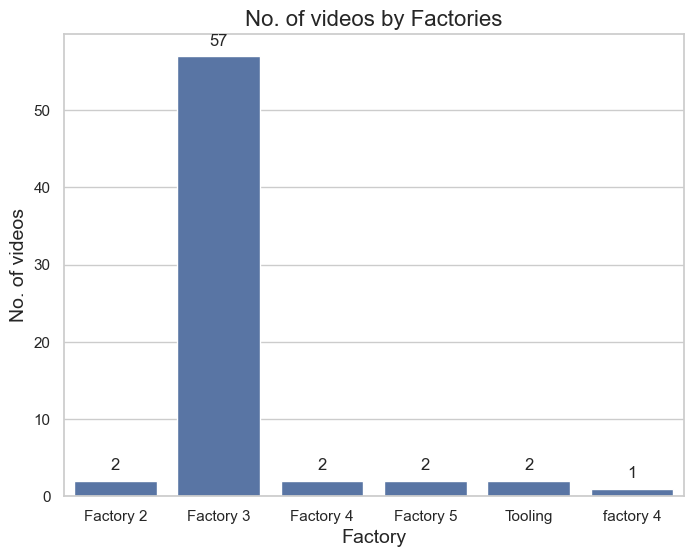

In [22]:
def draw_bar_plot():
    # Create a bar plot using Seaborn
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    # Use the barplot function from Seaborn
    ax = sns.barplot(x=grouped_df.index, y=grouped_df['video_file'])
    # Add titles and labels
    plt.title('No. of videos by Factories', fontsize=16)
    plt.xlabel('Factory', fontsize=14)
    plt.ylabel('No. of videos', fontsize=14)

    # Add numbers above the bars
    for i, v in enumerate(grouped_df['video_file']):
        ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=12)

    # Show the plot
    plt.show()